In [ ]:
# read a csv file to data frame
import pandas as pd
df = pd.read_excel('/content/hospital_readmissions_dataset.xlsx')


In [ ]:
df.head()

,Patient ID,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,1,70 to 80,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,no,no,no,yes,no
1,2,70 to 80,3,34,2,13,0,0,0,Other,Other,Other,no,no,no,yes,no
2,3,50 to 60,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,no,no,yes,yes,yes
3,4,70 to 80,2,36,0,12,1,0,0,Missing,Circulatory,Other,no,no,yes,yes,yes
4,5,60 to 70,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,no,no,no,yes,no


In [ ]:
df.shape

(3000, 17)

In [ ]:
df.drop_duplicates()

,Patient ID,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,1,70 to 80,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,no,no,no,yes,no
1,2,70 to 80,3,34,2,13,0,0,0,Other,Other,Other,no,no,no,yes,no
2,3,50 to 60,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,no,no,yes,yes,yes
3,4,70 to 80,2,36,0,12,1,0,0,Missing,Circulatory,Other,no,no,yes,yes,yes
4,5,60 to 70,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,50 to 60,2,47,0,14,0,0,0,Family/GeneralPractice,Diabetes,Other,no,high,no,yes,yes
2996,2997,60 to 70,3,22,3,20,0,0,0,Other,Musculoskeletal,Diabetes,no,no,yes,yes,no
2997,2998,40 to 50,14,43,4,22,0,3,0,Other,Other,Other,no,normal,no,yes,yes
2998,2999,80 to 90,1,60,0,8,0,0,0,Family/GeneralPractice,Circulatory,Other,no,no,no,no,no


In [ ]:
# handle outliers
column = 'time_in_hospital'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [ ]:
numeric_cols = ['time_in_hospital', 'n_inpatient', 'n_medications']
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
df.isnull().sum()


,0
Patient ID,0
age,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,0


In [ ]:
df.dropna(inplace=True)

In [ ]:

# df.fillna(df.mean(), inplace=True)
# df = df.dropna(subset=['readmitted'])

In [ ]:
# Normalize only the numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
# One-hot encode the gender column data
# df = pd.get_dummies(df, columns=['age'])
# get value counts for each outcome
df['readmitted'].value_counts()

,count
readmitted,
no,1434
yes,1172


In [ ]:
# Create a DataFrame to show actual vs predicted readmission status for the test set
results_df = pd.DataFrame({'Actual Readmitted': y_test, 'Predicted Readmitted': y_pred})

# Display the results
print("Actual vs Predicted Readmission Status for Test Set:")
display(results_df.head())

# You can also filter this DataFrame to see only those predicted as readmitted
print("\nPatients Predicted as Readmitted:")
display(results_df[results_df['Predicted Readmitted'] == 'yes'].head())

Actual vs Predicted Readmission Status for Test Set:


,Actual Readmitted,Predicted Readmitted
2675,yes,no
2788,no,no
215,no,no
2754,yes,yes
1049,yes,no



Patients Predicted as Readmitted:


,Actual Readmitted,Predicted Readmitted
2754,yes,yes
1271,yes,yes
2264,yes,yes
1065,no,yes
850,no,yes


In [ ]:
# Get the classification report for the Logistic Regression model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.60      0.72      0.65       288
         yes       0.53      0.40      0.46       234

    accuracy                           0.57       522
   macro avg       0.56      0.56      0.55       522
weighted avg       0.57      0.57      0.56       522



In [ ]:
# Identify categorical columns in X_train
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns in both X_train and X_test
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)


# Now, train the Logistic Regression model with the encoded data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- diag_2_Missing


In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
# print these scores
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, pos_label='yes'))
print('Recall: ', recall_score(y_test, y_pred, pos_label='yes'))
print('F1: ', f1_score(y_test, y_pred, pos_label='yes'))

Accuracy:  0.5747126436781609
Precision:  0.5340909090909091
Recall:  0.4017094017094017
F1:  0.4585365853658537


In [ ]:
# Get the classification report for the Logistic Regression model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.60      0.72      0.65       288
         yes       0.53      0.40      0.46       234

    accuracy                           0.57       522
   macro avg       0.56      0.56      0.55       522
weighted avg       0.57      0.57      0.56       522



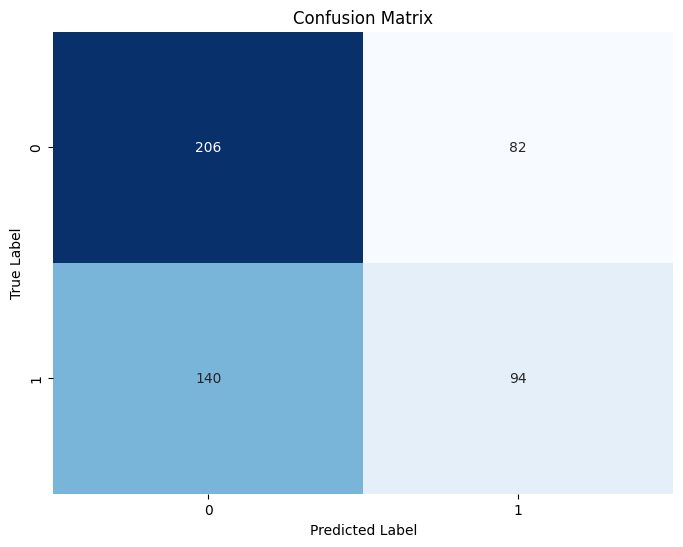

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Assuming y_test and y_pred are already defined and contain the true and predicted values
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()